In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('train1.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.drop(columns=['Name','Ticket'], axis = 1,inplace = True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [24]:
(df['Cabin_null'].mean())*100

77.10437710437711

In [32]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

In [33]:
df = pd.read_csv('train1.csv', usecols = ['Age','Fare', 'Survived'])

In [34]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
#######Create a function

In [40]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [42]:
median = df['Age'].median()

In [43]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [45]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


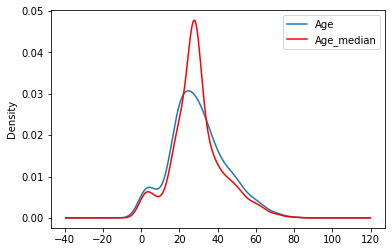

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [47]:
## kde = Kernel Density Estimator

# Random Sample Imputation 

In [85]:
df = pd.read_csv('train1.csv', usecols = ['Age', 'Survived','Fare'])

In [86]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [87]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [88]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [89]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [90]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [98]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ##It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [99]:
median = df['Age'].median()
median

28.0

In [100]:
impute_nan(df, 'Age', median)

In [101]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

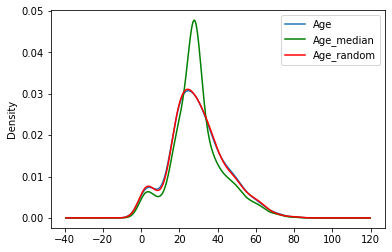

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [106]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [107]:
impute_nan(df, 'Age', median)

In [108]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


# Capturing NAN values with a new feature

In [110]:
#It works well if the data is not Missing Completely at random.

In [112]:
df = pd.read_csv('train1.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [113]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [115]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [117]:
df['Age'].median()

28.0

In [118]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution imputation

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('train1.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

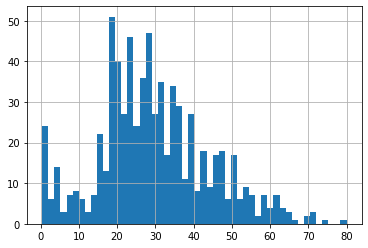

In [122]:
df['Age'].hist(bins = 50)

In [126]:
extreme = df['Age'].mean() + 3*(df['Age'].std())

In [127]:
extreme

73.27860964406094

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

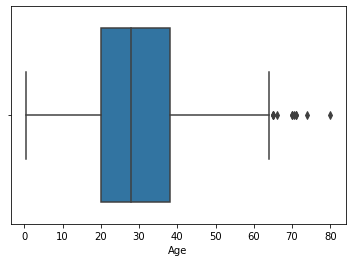

In [128]:
sns.boxplot('Age', data = df)

In [129]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [130]:
median = df['Age'].median()

In [132]:
impute_nan(df, 'Age', median, extreme)

In [134]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

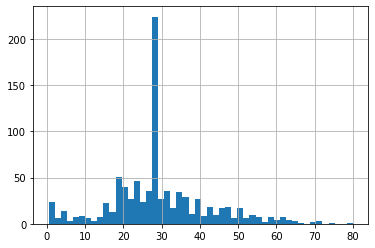

In [135]:
df['Age'].hist(bins = 50)

<AxesSubplot:>

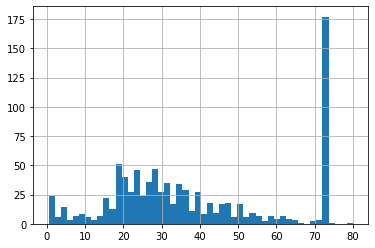

In [136]:
df['Age_end_distribution'].hist(bins = 50)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

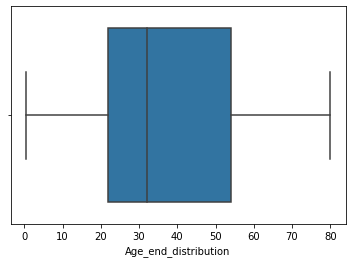

In [137]:
sns.boxplot('Age_end_distribution', data = df)

In [138]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [139]:
df = pd.read_csv('train1.csv', usecols = ['Fare', 'Age', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [141]:
extreme = df['Age'].mean() +3 * df['Age'].std()
median = df['Age'].median()

In [150]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample
    df[variable].fillna(median, inplace = True)
    df[variable+"_random_sample"] = df[variable].fillna(extreme)

In [151]:
impute_nan(df, 'Age',median, extreme)

In [152]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random,Age_random_sample
0,0,22.0,7.2500,22.0,22.00,22.0
1,1,38.0,71.2833,38.0,38.00,38.0
2,1,26.0,7.9250,26.0,26.00,26.0
3,1,35.0,53.1000,35.0,35.00,35.0
4,0,35.0,8.0500,35.0,35.00,35.0
5,0,28.0,8.4583,28.0,28.00,28.0
6,0,54.0,51.8625,54.0,54.00,54.0
7,0,2.0,21.0750,2.0,2.00,2.0
8,1,27.0,11.1333,27.0,27.00,27.0
9,1,14.0,30.0708,14.0,14.00,14.0


# Arbitrary Value Imputation

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv('train1.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [172]:
median = df['Age'].median()

In [177]:
def impute_nan(df, variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_hundred"] = df[variable].fillna(100)
    df[variable].fillna(median, inplace = True)

In [178]:
###Arbitrary Value
####### It should not be more frequently present

In [179]:
impute_nan(df, 'Age')

In [180]:
df.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,28.0,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


# Handling Missing Categorical Values

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv('loan.csv')

In [186]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
#####Frequent Category Imputation

In [188]:
df.shape

(1460, 81)

In [190]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])

In [191]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [192]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [193]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [194]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [195]:
df.isnull().mean() *100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64

In [196]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [199]:
###Compute the frequency

<AxesSubplot:xlabel='BsmtQual'>

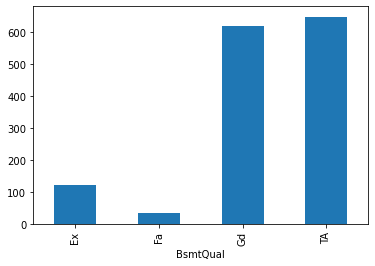

In [203]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [205]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

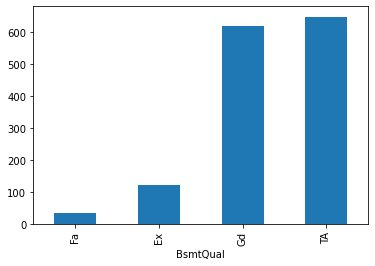

In [206]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = True).plot.bar()

In [207]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

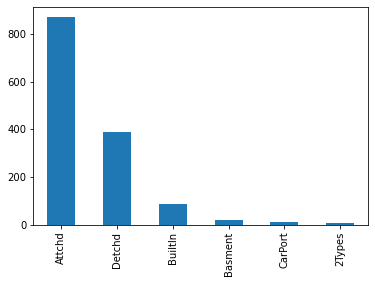

In [208]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

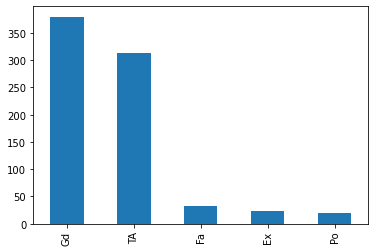

In [209]:
df['FireplaceQu'].value_counts().plot.bar()

In [210]:
### Replacing Function

In [214]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [218]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [219]:
impute_nan(df,'GarageType')

In [221]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [222]:
for features in df.columns:
    impute_nan(df, features)

In [223]:
df.head(25)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [224]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

<AxesSubplot:>

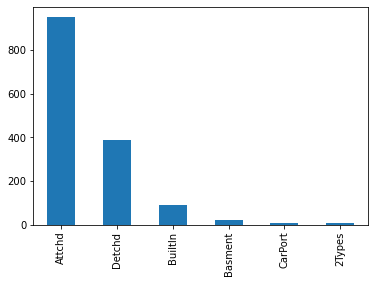

In [227]:
df['GarageType'].value_counts().plot.bar()

In [228]:
df['GarageType'].mode()[0]

'Attchd'

Easy to implement.

Faster way to implement

# Adding a variable to capture NAN

In [241]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])

In [242]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [243]:
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [244]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [249]:
frequent = df['BsmtQual'].mode()[0]

In [251]:
df['BsmtQual'].fillna(frequent, inplace = True)

In [253]:
df['BsmtQual'].isna().sum()

0

In [256]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [258]:
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
df['FireplaceQu'].fillna(frequent, inplace = True)

In [259]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [260]:
## In the above technique, we would be creating many features which is a disadvantage

Suppose if you have more frequent categories, we just replace NAN with a new category

In [269]:
df = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])

In [270]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [271]:
def impute_nan(df, variable):
    df[variable+"_newvar"] = np.where(df[variable].isnull(), "Missing", df[variable])

In [272]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [273]:
df.head(25)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


<AxesSubplot:>

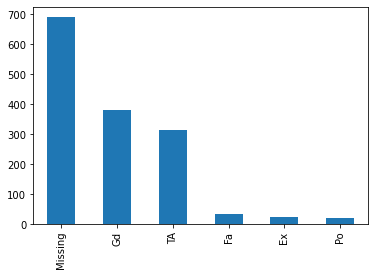

In [275]:
df['FireplaceQu_newvar'].value_counts().plot.bar()

In [278]:
df = df.drop(columns = ['GarageType','BsmtQual','FireplaceQu'], axis = 1)

In [280]:
df.head(10)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,Missing,Attchd
6,307000,Ex,Gd,Attchd
7,200000,Gd,TA,Attchd
8,129900,TA,TA,Detchd
9,118000,TA,TA,Attchd
